In [50]:
#Importing needed libraries
import pandas as pd
from sqlalchemy import create_engine
import sqlalchemy as db
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
#Create Connection to Postgres engine
engine = create_engine('postgresql://carlospazos@127.0.0.1:5432/EmployeeSQL')
connection = engine.connect()

In [52]:
#Retrieve Salaries Table
query = 'SELECT * FROM salaries'
df = pd.read_sql(query,connection)
df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


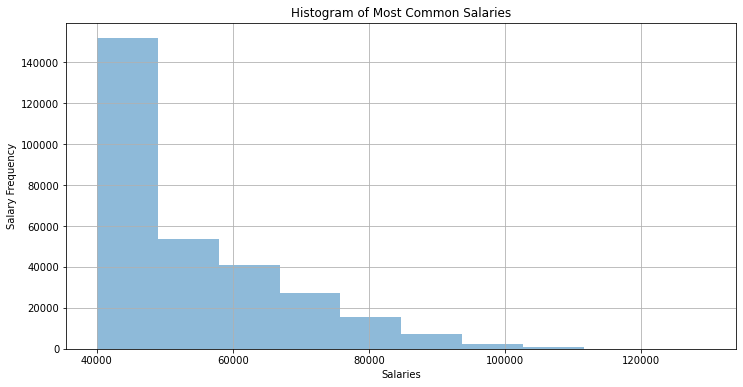

In [53]:
#Create Histogram to Visualize Most Common Salaries
plt.figure(figsize=(12,6))
df['salary'].hist(bins=10, alpha=0.5)
plt.title('Histogram of Most Common Salaries')
plt.xlabel('Salaries')
plt.ylabel('Salary Frequency')
plt.show()

In [54]:
#Create Query to Find the Average Salary by Title
query = 'select t.title, q.salary, q.emp_no, q.emp_title_id from titles t inner join' \
'(select e.emp_no, e.emp_title_id, s.salary from employees e inner join'\
'(select emp_no, salary from salaries) s on e.emp_no=s.emp_no) q on t.title_id=q.emp_title_id'
data = pd.read_sql(query,connection)
data.head()

,title,salary,emp_no,emp_title_id
0,Engineer,48973,57444,e0002
1,Senior Engineer,40000,13616,e0003
2,Technique Leader,43548,240129,e0004
3,Staff,63377,427958,s0001
4,Senior Engineer,40000,35916,e0003


In [55]:
#Get the average salary 
avg_salary = data.groupby(by='title').mean()['salary']
avg_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

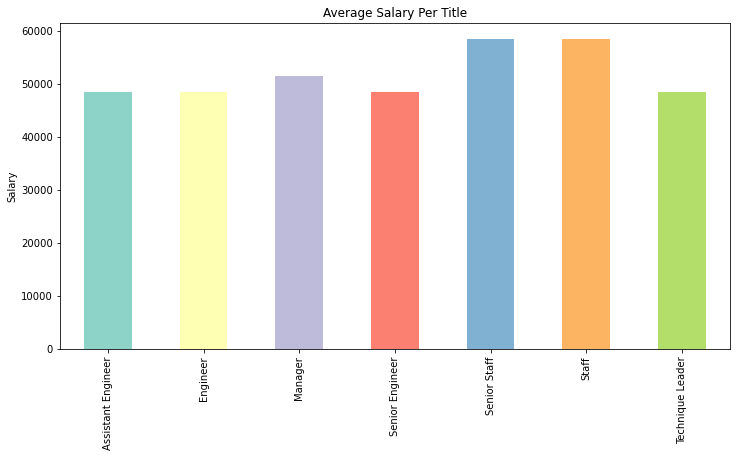

In [56]:
ax = avg_salary.plot(kind='bar', figsize=(12,6),
                title='Average Salary Per Title',
                color= plt.get_cmap('Set3').colors)

ax.set_ylabel('Salary')
ax.set_xlabel('')
plt.show()